In [160]:
import pandas as pd
data = pd.read_csv("C:\\Users\\35988\\Downloads\\qnmj55jovjm7w33g.csv")
data.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,optionid,index_flag,issuer,exercise_style
0,1996-01-04,1996-03-16,C,625000,9.1250,9.875,463,10177785,1,CBOE S&P 500 INDEX,E
1,1996-01-04,1996-03-16,C,580000,41.5000,42.500,136,10194353,1,CBOE S&P 500 INDEX,E
2,1996-01-04,1996-03-16,P,530000,0.4375,0.625,250,10146564,1,CBOE S&P 500 INDEX,E
3,1996-01-04,1996-02-17,P,625000,12.2500,13.000,1342,10055271,1,CBOE S&P 500 INDEX,E
4,1996-01-04,1996-03-16,P,525000,0.5000,0.625,100,10170877,1,CBOE S&P 500 INDEX,E


In [161]:
#Cleaning up the dataframe using only contracts that expire before the 27th of each month

data['date'] = pd.to_datetime(data['date'])
data['exdate'] = pd.to_datetime(data['exdate'])
data = data[data['exdate'].dt.day<27]
data = data[data['date'].dt.year<2000]



In [162]:
def naive_strat(data):
    data = data[data['cp_flag']=='C']

    #data with index idx is the dataframe where we only consider the largest strikes for each trading date

    idx = data.groupby(['date','exdate'])['strike_price'].transform(max)==data['strike_price']
    data_idx = data[idx]

    #bid_series is the mean of the cross-section of the optin prices for each tradin date - 3 month moving avearge is self explanatory

    bid_series = data_idx.groupby('date')['best_bid'].mean()
    three_month_moving_avg = bid_series.rolling('90D').mean()

    return plt.plot(three_month_moving_avg)


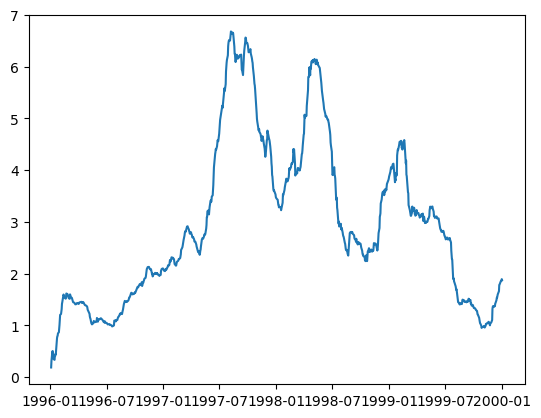

In [163]:
import matplotlib.pyplot as plt
naive_strat(data)

In [164]:
idx = data.groupby(['date','exdate','cp_flag'])['strike_price'].transform('min')==data['strike_price']
data_idx = data[idx]


In [165]:
idx1 = data.groupby(['date','exdate','cp_flag'])['strike_price'].transform('max')==data['strike_price']
data_idx1 = data[idx1]


In [166]:

data_c_min = data_idx[data_idx['cp_flag']=='C']
data_c_max = data_idx1[data_idx1['cp_flag']=='C']
data_p_min = data_idx[data_idx['cp_flag']=='P']
data_p_max = data_idx1[data_idx1['cp_flag']=='P']


In [167]:
data_p_max

,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,optionid,index_flag,issuer,exercise_style
65,1996-01-04,1996-01-20,P,630000,14.250,15.000,1755,11438652,1,CBOE S&P 500 INDEX,E
81,1996-01-04,1996-03-16,P,650000,31.500,32.500,1,11784891,1,CBOE S&P 500 INDEX,E
82,1996-01-04,1996-02-17,P,645000,27.375,28.375,100,11801908,1,CBOE S&P 500 INDEX,E
164,1996-01-05,1996-01-20,P,635000,19.000,19.750,6,11663255,1,CBOE S&P 500 INDEX,E
173,1996-01-05,1996-03-16,P,650000,31.750,32.750,1,11784891,1,CBOE S&P 500 INDEX,E
...,...,...,...,...,...,...,...,...,...,...,...
104184,1999-12-30,2000-01-22,P,1750000,278.250,280.250,3,10721287,1,CBOE S&P 500 INDEX,E
104202,1999-12-30,2000-03-18,P,1700000,217.125,219.125,2,10986784,1,CBOE S&P 500 INDEX,E
104301,1999-12-31,2000-01-22,P,1750000,275.500,275.625,39,10721287,1,CBOE S&P 500 INDEX,E
104322,1999-12-31,2000-03-18,P,1700000,214.875,215.000,2,10986784,1,CBOE S&P 500 INDEX,E


In [168]:
data_p_max = data_p_max[['date','exdate', 'strike_price']]
data_c_max = data_c_max[['date','exdate', 'strike_price']]
data_p_min = data_p_min[['date','exdate', 'strike_price']]
data_c_min = data_c_min[['date','exdate', 'strike_price']]

In [169]:
data_p_max

,date,exdate,strike_price
65,1996-01-04,1996-01-20,630000
81,1996-01-04,1996-03-16,650000
82,1996-01-04,1996-02-17,645000
164,1996-01-05,1996-01-20,635000
173,1996-01-05,1996-03-16,650000
...,...,...,...
104184,1999-12-30,2000-01-22,1750000
104202,1999-12-30,2000-03-18,1700000
104301,1999-12-31,2000-01-22,1750000
104322,1999-12-31,2000-03-18,1700000


In [170]:
check = pd.merge(data_c_max, data_p_max, on=['date','exdate'])
check['diff']=check['strike_price_x'] - check['strike_price_y']
check[check['diff'] == check['diff'].min()]

,date,exdate,strike_price_x,strike_price_y,diff
2540,1999-09-08,1999-09-18,1450000,1750000,-300000


In [171]:

check1 = pd.merge(data_c_min, data_p_min, on=['date', 'exdate'])
check1['diff'] = check1['strike_price_x'] - check1['strike_price_y']
check1[check1['diff'] == check1['diff'].min()]

,date,exdate,strike_price_x,strike_price_y,diff
2138,1999-02-09,1999-02-20,400000,1050000,-650000


In [172]:
data_p_min

,date,exdate,strike_price
25,1996-01-04,1996-02-17,500000
27,1996-01-04,1996-03-16,500000
67,1996-01-04,1996-01-20,540000
87,1996-01-05,1996-01-20,525000
99,1996-01-05,1996-03-16,450000
...,...,...,...
104191,1999-12-30,2000-02-19,1100000
104197,1999-12-30,2000-01-22,975000
104286,1999-12-31,2000-03-18,750000
104310,1999-12-31,2000-02-19,1100000


In [173]:
data_p_max.set_index('date', inplace=True)
data_c_max.set_index('date', inplace=True)
data_p_min.set_index('date', inplace=True)
data_c_min.set_index('date', inplace=True)

In [174]:
data_p = data[data['cp_flag']=='P']
data_c = data[data['cp_flag']=='C']

In [175]:
data_p_c_min = pd.merge(data_p,data_c_min, on=['date','exdate','strike_price'], how='inner')
data_p_p_min = pd.merge(data_p,data_p_min, on=['date','exdate','strike_price'], how='inner')
data_p_p_max = pd.merge(data_p,data_p_max, on=['date','exdate','strike_price'], how='inner')
data_c_c_min = pd.merge(data_c,data_c_min, on=['date','exdate','strike_price'], how='inner')
data_c_c_max = pd.merge(data_c,data_c_max, on=['date','exdate','strike_price'], how='inner')
data_c_p_max = pd.merge(data_c,data_p_max, on=['date','exdate','strike_price'], how='inner')

In [176]:
data_c_min

,exdate,strike_price
date,,
1996-01-04,1996-02-17,595000
1996-01-04,1996-03-16,500000
1996-01-04,1996-01-20,560000
1996-01-05,1996-01-20,525000
1996-01-05,1996-03-16,585000
...,...,...
1999-12-30,2000-03-18,1300000
1999-12-30,2000-01-22,1025000
1999-12-31,2000-02-19,1400000


In [177]:
data_p

,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,optionid,index_flag,issuer,exercise_style
2,1996-01-04,1996-03-16,P,530000,0.4375,0.6250,250,10146564,1,CBOE S&P 500 INDEX,E
3,1996-01-04,1996-02-17,P,625000,12.2500,13.0000,1342,10055271,1,CBOE S&P 500 INDEX,E
4,1996-01-04,1996-03-16,P,525000,0.5000,0.6250,100,10170877,1,CBOE S&P 500 INDEX,E
7,1996-01-04,1996-03-16,P,575000,2.3125,2.6875,10,10043558,1,CBOE S&P 500 INDEX,E
8,1996-01-04,1996-03-16,P,600000,6.0000,6.5000,3917,10078616,1,CBOE S&P 500 INDEX,E
...,...,...,...,...,...,...,...,...,...,...,...
104378,1999-12-31,2000-02-19,P,1325000,10.7500,10.8750,1,11785729,1,CBOE S&P 500 INDEX,E
104379,1999-12-31,2000-03-18,P,1300000,14.8750,15.0000,133,11793470,1,CBOE S&P 500 INDEX,E
104380,1999-12-31,2000-01-22,P,1460000,24.2500,24.3750,21,11799565,1,CBOE S&P 500 INDEX,E
104381,1999-12-31,2000-01-22,P,1350000,5.6250,5.7500,566,11799971,1,CBOE S&P 500 INDEX,E


In [178]:
# Function to find closest value in a dataframe column
def find_closest_value(value, df):
    return df.iloc[(df['strike_price'] - value).abs().argsort()[:1]]


In [179]:
check = pd.merge(data_p,data_c_min, on=['date','exdate'], how='inner')
check['closest'] = check['strike_price_x'].apply(lambda x: find_closest_value(x,data_c_min).values[0])
check

,date,exdate,cp_flag,strike_price_x,best_bid,best_offer,volume,optionid,index_flag,issuer,exercise_style,strike_price_y,closest
0,1996-01-04,1996-03-16,P,530000,0.4375,0.6250,250,10146564,1,CBOE S&P 500 INDEX,E,500000,"[1996-03-16 00:00:00, 530000]"
1,1996-01-04,1996-03-16,P,525000,0.5000,0.6250,100,10170877,1,CBOE S&P 500 INDEX,E,500000,"[1998-12-19 00:00:00, 525000]"
2,1996-01-04,1996-03-16,P,575000,2.3125,2.6875,10,10043558,1,CBOE S&P 500 INDEX,E,500000,"[1996-03-16 00:00:00, 575000]"
3,1996-01-04,1996-03-16,P,600000,6.0000,6.5000,3917,10078616,1,CBOE S&P 500 INDEX,E,500000,"[1997-01-18 00:00:00, 600000]"
4,1996-01-04,1996-03-16,P,560000,1.7500,2.0000,3,10250526,1,CBOE S&P 500 INDEX,E,500000,"[1996-06-22 00:00:00, 560000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61282,1999-12-31,2000-01-22,P,1300000,3.1250,3.2500,627,11744913,1,CBOE S&P 500 INDEX,E,975000,"[1999-10-16 00:00:00, 1300000]"
61283,1999-12-31,2000-01-22,P,1100000,0.3125,0.3750,7,11776719,1,CBOE S&P 500 INDEX,E,975000,"[1998-08-22 00:00:00, 1100000]"
61284,1999-12-31,2000-01-22,P,1460000,24.2500,24.3750,21,11799565,1,CBOE S&P 500 INDEX,E,975000,"[1999-10-16 00:00:00, 1450000]"
61285,1999-12-31,2000-01-22,P,1350000,5.6250,5.7500,566,11799971,1,CBOE S&P 500 INDEX,E,975000,"[1999-11-20 00:00:00, 1350000]"


In [180]:
L1 = pd.merge(data_p_c_min,data_p_p_min, on=['date','exdate'], how='inner')
L1 = pd.merge(L1,data_c_c_min, on=['date','exdate'], how='inner' )
L1['L1'] = L1['best_offer_x'] - L1['best_offer_y'] - L1['best_offer']


In [181]:
L2 = pd.merge(data_p_p_max,data_p_p_min, on=['date','exdate'], how='inner')
L2 = pd.merge(L2,data_c_p_max, on=['date','exdate'], how='inner' )
L2['L2'] = L2['best_offer_x'] - L2['best_offer_y'] - L2['best_offer']

In [182]:
U1 = pd.merge(data_p_c_min,data_c_c_max, on=['date','exdate'], how='inner')
U1 = pd.merge(U1,data_c_c_min, on=['date','exdate'], how='inner' )
U1['U1'] = U1['best_offer_x'] + U1['best_offer_y'] - U1['best_offer']

In [183]:
U2 = pd.merge(data_p_p_max,data_c_c_max, on=['date','exdate'], how='inner')
U2 = pd.merge(U2,data_c_p_max, on=['date','exdate'], how='inner' )
U2['U2'] = U2['best_offer_x'] + U2['best_offer_y'] - U2['best_offer']

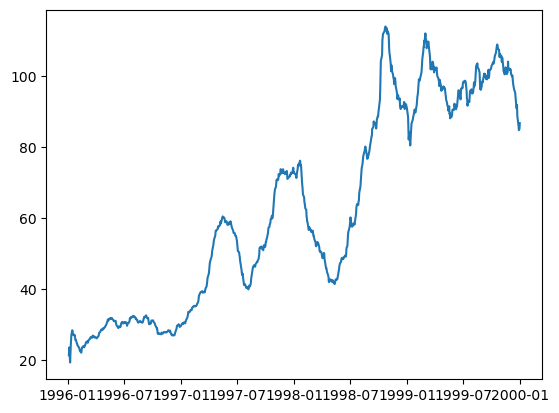

In [184]:
bid_series = L2.groupby('date')['L2'].mean()
three_month_moving_avgL1 = bid_series.rolling('90D').mean()
plt.plot(three_month_moving_avgL1)

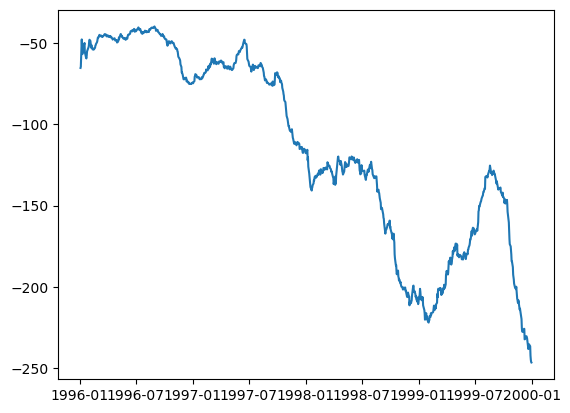

In [185]:
bid_seriesU1 = U1.groupby('date')['U1'].mean()
three_month_moving_avg = bid_seriesU1.rolling('90D').mean()
plt.plot(three_month_moving_avg)


In [186]:
import yfinance as yf

# Define the ticker symbol for the S&P 500 index
ticker_symbol = '^GSPC'

# Define the start date
start_date = '1996-01-01'

# Download historical data
sp500_data = yf.download(ticker_symbol, start=start_date)



[*********************100%%**********************]  1 of 1 completed


In [187]:



# de-annualize yearly interest rates
def deannualize(annual_rate, periods=365):
    return (1 + annual_rate) ** (1 / periods) - 1


def get_risk_free_rate():
    # download 3-month us treasury bills rates
    annualized = yf.download("^IRX")["Adj Close"]

    # de-annualize
    daily = annualized.apply(deannualize)
    rf = pd.DataFrame({"annualized": annualized, "daily": daily})

    # create dataframe
    return rf


rf = get_risk_free_rate()
rf
risk_free = rf['annualized'] / 100

[*********************100%%**********************]  1 of 1 completed


In [188]:
sp500 = sp500_data['Close']
sp500



Date
1996-01-02     620.729980
1996-01-03     621.320007
1996-01-04     617.700012
1996-01-05     616.710022
1996-01-08     618.460022
                 ...     
2024-03-19    5178.509766
2024-03-20    5224.620117
2024-03-21    5241.529785
2024-03-22    5234.180176
2024-03-25    5218.189941
Name: Close, Length: 7106, dtype: float64

In [189]:
risk_free

Date
1960-01-04    0.04520
1960-01-05    0.04550
1960-01-06    0.04680
1960-01-07    0.04630
1960-01-08    0.04590
               ...   
2024-03-19    0.05238
2024-03-20    0.05228
2024-03-21    0.05228
2024-03-22    0.05220
2024-03-25    0.05218
Name: annualized, Length: 16069, dtype: float64

In [190]:
U1.set_index('date', inplace=True)


In [191]:
U1 = pd.merge(U1, sp500, left_index=True, right_index=True)


In [192]:
U1 = pd.merge(U1, risk_free, left_index=True, right_index=True)

In [193]:
U1[['U1','strike_price','Close','annualized']]

,U1,strike_price,Close,annualized
1996-01-04,-118.0000,500000,617.700012,0.0503
1996-01-04,-56.1875,560000,617.700012,0.0503
1996-01-04,-22.1875,595000,617.700012,0.0503
1996-01-05,-91.0000,525000,616.710022,0.0504
1996-01-05,-66.8750,550000,616.710022,0.0504
...,...,...,...,...
1999-12-30,-442.6250,1025000,1464.469971,0.0501
1999-12-30,-176.3750,1300000,1464.469971,0.0501
1999-12-31,-496.0625,975000,1469.250000,0.0517
1999-12-31,-229.8125,1250000,1469.250000,0.0517


In [194]:
U1['diff'] = (U1.exdate - U1.index).dt.days

In [195]:
U1['U11']= U1['Close'] - (U1['strike_price']/1000)*2.718**(-U1['annualized']*U1['diff']/365) + U1['U1']


In [196]:
L1.set_index('date', inplace=True)

L1 = pd.merge(L1, sp500, left_index=True, right_index=True)

L1 = pd.merge(L1, risk_free, left_index=True, right_index=True)
L1[['L1', 'strike_price', 'Close', 'annualized']]
L1['diff'] = (L1.exdate - L1.index).dt.days
L1['L11'] = L1['Close'] - (L1['strike_price_x'] / 1000) * 2.718 ** (-L1['annualized'] * L1['diff'] / 365) + L1['L1']

In [197]:
L1

,exdate,cp_flag_x,strike_price_x,best_bid_x,best_offer_x,volume_x,optionid_x,index_flag_x,issuer_x,exercise_style_x,...,volume,optionid,index_flag,issuer,exercise_style,L1,Close,annualized,diff,L11
1996-01-04,1996-03-16,P,500000,0.2500,0.5000,500,10539629,1,CBOE S&P 500 INDEX,E,...,45,10763640,1,CBOE S&P 500 INDEX,E,-118.8750,617.700012,0.0503,72,3.761068
1996-01-04,1996-01-20,P,560000,0.1875,0.3125,100,10975929,1,CBOE S&P 500 INDEX,E,...,10,10967275,1,CBOE S&P 500 INDEX,E,-56.4375,617.700012,0.0503,16,2.495786
1996-01-04,1996-02-17,P,595000,3.1250,3.6250,1114,10980129,1,CBOE S&P 500 INDEX,E,...,3,10705713,1,CBOE S&P 500 INDEX,E,-22.7500,617.700012,0.0503,44,3.546544
1996-01-05,1996-01-20,P,525000,0.0625,0.1250,100,10177366,1,CBOE S&P 500 INDEX,E,...,200,10206430,1,CBOE S&P 500 INDEX,E,-91.2500,616.710022,0.0504,15,1.546181
1996-01-05,1996-02-17,P,550000,0.5000,0.6250,200,10585059,1,CBOE S&P 500 INDEX,E,...,1,11297248,1,CBOE S&P 500 INDEX,E,-68.3125,616.710022,0.0504,43,1.653153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-30,2000-01-22,P,1025000,0.1875,0.5000,423,11398249,1,CBOE S&P 500 INDEX,E,...,200,11771374,1,CBOE S&P 500 INDEX,E,-444.1250,1464.469971,0.0501,23,-1.424555
1999-12-30,2000-03-18,P,1300000,15.5000,16.2500,2447,11793470,1,CBOE S&P 500 INDEX,E,...,9,10500175,1,CBOE S&P 500 INDEX,E,-178.8750,1464.469971,0.0501,79,-0.385998
1999-12-31,2000-01-22,P,975000,0.0625,0.1250,100,10883322,1,CBOE S&P 500 INDEX,E,...,2,11484787,1,CBOE S&P 500 INDEX,E,-497.0000,1469.250000,0.0517,22,0.283217
1999-12-31,2000-03-18,P,1250000,10.6250,10.7500,21,11250885,1,CBOE S&P 500 INDEX,E,...,10,11427012,1,CBOE S&P 500 INDEX,E,-230.8750,1469.250000,0.0517,78,2.107849


In [198]:
L2.set_index('date', inplace=True)

L2 = pd.merge(L2, sp500, left_index=True, right_index=True)

L2 = pd.merge(L2, risk_free, left_index=True, right_index=True)
L2[['L2', 'strike_price', 'Close', 'annualized']]
L2['diff'] = (L2.exdate - L2.index).dt.days
L2['L22'] = L2['Close'] - (L2['strike_price_x'] / 1000) * 2.718 ** (-L2['annualized'] * L2['diff'] / 365) + L2['L2']

In [199]:
U2.set_index('date', inplace=True)

U2 = pd.merge(U2, sp500, left_index=True, right_index=True)

U2 = pd.merge(U2, risk_free, left_index=True, right_index=True)
U2[['U2', 'strike_price', 'Close', 'annualized']]
U2['diff'] = (U2.exdate - U2.index).dt.days
U2['U22'] = U2['Close'] - (U2['strike_price_x'] / 1000) * 2.718 ** (-U2['annualized'] * U2['diff'] / 365) + U2['U2']

In [200]:
U1

,exdate,cp_flag_x,strike_price_x,best_bid_x,best_offer_x,volume_x,optionid_x,index_flag_x,issuer_x,exercise_style_x,...,volume,optionid,index_flag,issuer,exercise_style,U1,Close,annualized,diff,U11
1996-01-04,1996-03-16,P,500000,0.2500,0.5000,500,10539629,1,CBOE S&P 500 INDEX,E,...,45,10763640,1,CBOE S&P 500 INDEX,E,-118.0000,617.700012,0.0503,72,4.636068
1996-01-04,1996-01-20,P,560000,0.1875,0.3125,100,10975929,1,CBOE S&P 500 INDEX,E,...,10,10967275,1,CBOE S&P 500 INDEX,E,-56.1875,617.700012,0.0503,16,2.745786
1996-01-04,1996-02-17,P,595000,3.1250,3.6250,1114,10980129,1,CBOE S&P 500 INDEX,E,...,3,10705713,1,CBOE S&P 500 INDEX,E,-22.1875,617.700012,0.0503,44,4.109044
1996-01-05,1996-01-20,P,525000,0.0625,0.1250,100,10177366,1,CBOE S&P 500 INDEX,E,...,200,10206430,1,CBOE S&P 500 INDEX,E,-91.0000,616.710022,0.0504,15,1.796181
1996-01-05,1996-02-17,P,550000,0.5000,0.6250,200,10585059,1,CBOE S&P 500 INDEX,E,...,1,11297248,1,CBOE S&P 500 INDEX,E,-66.8750,616.710022,0.0504,43,3.090653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-30,2000-01-22,P,1025000,0.1875,0.5000,423,11398249,1,CBOE S&P 500 INDEX,E,...,200,11771374,1,CBOE S&P 500 INDEX,E,-442.6250,1464.469971,0.0501,23,0.075445
1999-12-30,2000-03-18,P,1300000,15.5000,16.2500,2447,11793470,1,CBOE S&P 500 INDEX,E,...,9,10500175,1,CBOE S&P 500 INDEX,E,-176.3750,1464.469971,0.0501,79,2.114002
1999-12-31,2000-01-22,P,975000,0.0625,0.1250,100,10883322,1,CBOE S&P 500 INDEX,E,...,2,11484787,1,CBOE S&P 500 INDEX,E,-496.0625,1469.250000,0.0517,22,1.220717
1999-12-31,2000-03-18,P,1250000,10.6250,10.7500,21,11250885,1,CBOE S&P 500 INDEX,E,...,10,11427012,1,CBOE S&P 500 INDEX,E,-229.8125,1469.250000,0.0517,78,3.170349


In [201]:
bid_seriesU1 = U1.groupby(level=0)['U11'].mean()
three_month_moving_avgU1 = bid_seriesU1.rolling('90D').mean()
bid_seriesL1 = L1.groupby(level=0)['L11'].mean()
three_month_moving_avgL1 = bid_seriesL1.rolling('90D').mean()
bid_seriesU2 = U2.groupby(level=0)['U22'].mean()
three_month_moving_avgU2 = bid_seriesU2.rolling('90D').mean()
bid_seriesL2 = L2.groupby(level=0)['L22'].mean()
three_month_moving_avgL2 = bid_seriesL2.rolling('90D').mean()

In [202]:

lower = 0.5*three_month_moving_avgL1+0.5*three_month_moving_avgL2
higher = 0.5*three_month_moving_avgU1+0.5*three_month_moving_avgU2
mid = (lower+higher)/2

In [203]:
three_month_moving_avgL1

1996-01-04    3.267799
1996-01-05    2.694898
1996-01-08    1.892726
1996-01-09    2.638276
1996-01-10    2.629228
                ...   
1999-12-27   -2.168799
1999-12-28   -2.260747
1999-12-29   -2.276302
1999-12-30   -2.318946
1999-12-31   -2.267170
Name: L11, Length: 961, dtype: float64

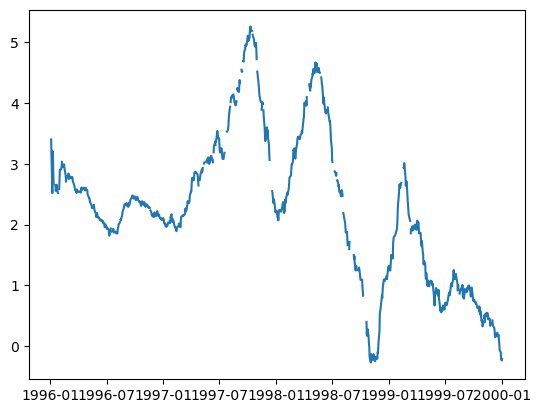

In [204]:
fig, ax = plt.subplots()
ax.plot(mid)
#ax2 = ax.twinx()
#ax2.plot(sp500[sp500.index.year>2010].pct_change().rolling('90D').agg(lambda x: (x + 1).prod() - 1), color='g')
#plt.plot(0.5*three_month_moving_avgU1+0.5*three_month_moving_avgU2)


In [205]:
mid.isna().sum()

86

In [206]:
import numpy as np
month_return = sp500.pct_change().resample('M').agg(lambda x: (x + 1).prod() - 1)
month_return_lb = month_return.rolling(12).agg(lambda x: (x + 1).prod() - 1)
bubble = mid.pct_change().resample('M').agg(lambda x: (x + 1).prod() - 1)
bubble = bubble.rolling(12).agg(lambda x: (x + 1).prod() - 1)


df = pd.DataFrame()
df["returns_1M"] = month_return
df["returns_lookback"] = month_return_lb
df['bubble'] = bubble


position = []
position_mom = []
for index, rows in df.iterrows():
    if (rows['returns_lookback'] > 0) | (rows['bubble'] > 0) :
        position.append(1)
    #elif (rows['returns_lookback'] < 0) & (rows['bubble'] > 0):
        #position.append(-1)
    else:
        position.append(0)

for index, rows in df.iterrows():
    if (rows['returns_lookback'] > 0):
        position_mom.append(1)
    #elif (rows['returns_lookback'] < 0):
     #   position_mom.append(-1)
    else:
        position_mom.append(0)

df['position'] = np.array(position)
df["strat"] = df["position"].shift(1) * df["returns_1M"]

df['cum_returns_1M'] = (1 + df['returns_1M']).cumprod() - 1
df['cum_returns_strat'] = (1 + df['strat']).cumprod() - 1

df['position_mom'] = np.array(position_mom)
df["strat_mom"] = df["position_mom"].shift(1) * df["returns_1M"]


df['cum_returns_strat_mom'] = (1 + df['strat_mom']).cumprod() - 1


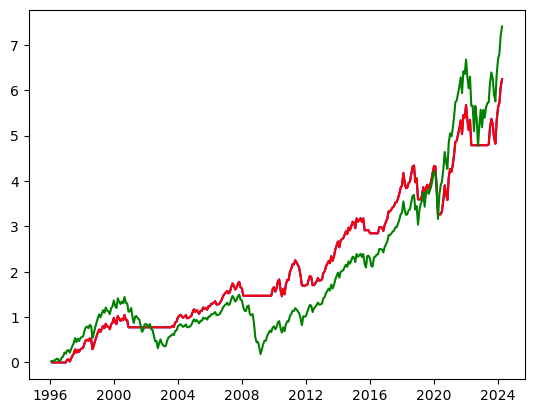

In [207]:
fig,ax = plt.subplots()
ax.plot(df['cum_returns_strat'], color='b')
ax.plot(df['cum_returns_strat_mom'], color='r')

ax.plot(df['cum_returns_1M'], color='g')


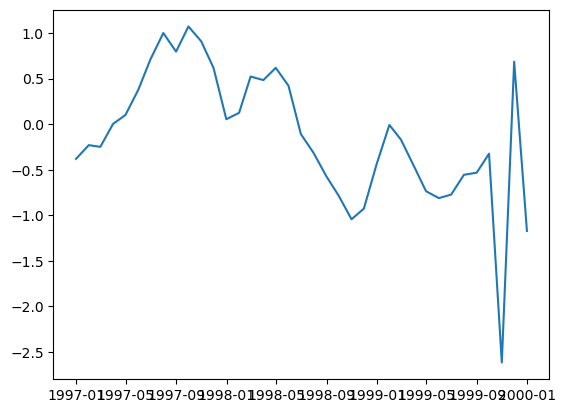

In [208]:
plt.plot(df.bubble)